https://stepik.org/lesson/1370104/step/9

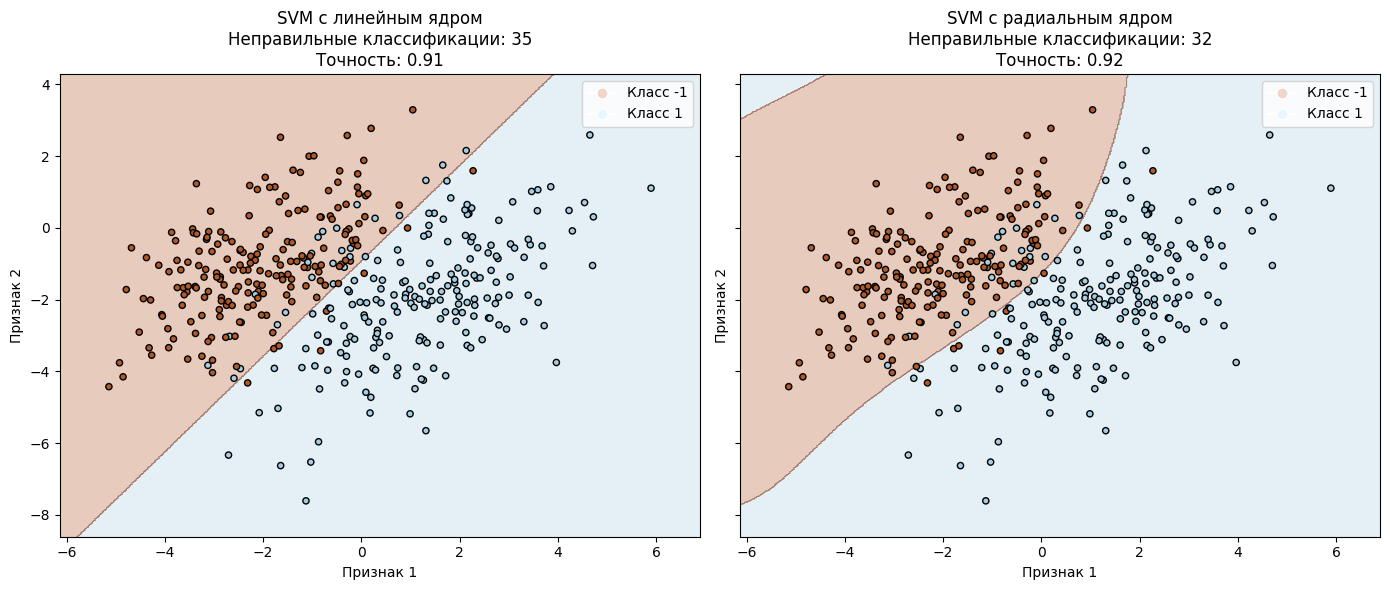

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(0)

# исходные параметры распределений классов
r1 = 0.6
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-2, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N = 500
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N) * -1, np.ones(N)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.4, shuffle=True)

# Обучение двух моделей SVM (линейное и радиальное ядра) для сравнения графиков
clf_linear = svm.SVC(kernel='linear').fit(x_train, y_train)
clf_rbf = svm.SVC(kernel='rbf').fit(x_train, y_train)

predict = clf_rbf.predict(x_test)

Q = (predict != y_test).mean()

'''ГРАФИКИ'''
# Функция для построения области решений
def plot_decision_boundary(ax, clf, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=20)

    predictions = clf.predict(X)
    errors = (predictions != y).sum()
    accuracy = accuracy_score(y, predictions)

    ax.set_title(f"{title}\nНеправильные классификации: {errors}\nТочность: {accuracy:.2f}")
    ax.set_xlabel("Признак 1")
    ax.set_ylabel("Признак 2")

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# График для линейного ядра
plot_decision_boundary(axes[0], clf_linear, x_test, y_test, "SVM с линейным ядром")

# График для радиального ядра
plot_decision_boundary(axes[1], clf_rbf, x_test, y_test, "SVM с радиальным ядром")

# Легенда
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#f2d5c9', markersize=8, label='Класс -1'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#e8f7ff', markersize=8, label='Класс 1')]
for ax in axes:
    ax.legend(handles=handles, loc='upper right')

plt.tight_layout()
plt.show()

NameError: name 'plot_decision_boundary' is not defined

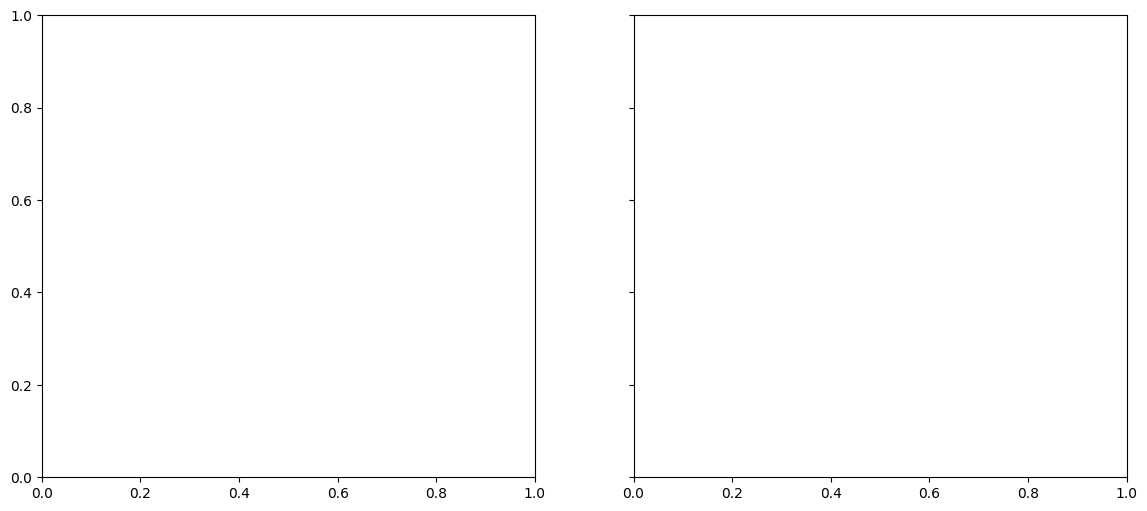

In [ ]:
# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# График для линейного ядра
plot_decision_boundary(axes[0], clf_linear, x_test, y_test, "SVM с линейным ядром")

# График для радиального ядра
plot_decision_boundary(axes[1], clf_rbf, x_test, y_test, "SVM с радиальным ядром")

# Легенда
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8, label='Класс -1'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=8, label='Класс 1')]
for ax in axes:
    ax.legend(handles=handles, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# График
import matplotlib.pyplot as plt

plt.scatter(x1[0], x1[1], color='red', label='Класс 0')
plt.scatter(x2[0], x2[1], color='blue', label='Класс 1')

# # TODO прлблема, что нет coef_ для w
# xx = np.linspace(-6, 6)
# yy = -(w[0] + w[1] * xx) / w[2]
# plt.plot(xx, yy, 'k--', label='Разделяющая линия', color='red')

# plt.plot(coord_x, coord_y, label='Функция')
# plt.plot(coord_x, predict, 'k--', label='Модель', color='red')
plt.legend()
plt.show()